***Written by Ho Sy The***

Hanoi University of Science and Technology

IT1 04 - K65.

*Github: https://github.com/hsthe29*

- **date: 2022-06-30**

# Code in paper: https://machinelearningcoban.com/2017/08/08/nbc/

In [1]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
import numpy as np 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


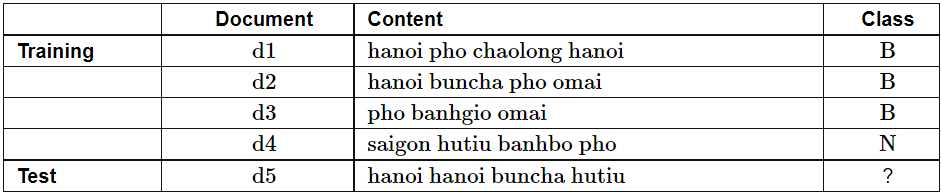

In [2]:
# train data
d1 = [2, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N']) 

# test data
d5 = np.array([[2, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

## call MultinomialNB
clf = MultinomialNB()
# training 
clf.fit(train_data, label)

# test
print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Probability of d6 in each class:', clf.predict_proba(d6))


Predicting class of d5: B
Probability of d6 in each class: [[0.29175335 0.70824665]]


In [10]:
# train data
d1 = [1, 1, 1, 0, 0, 0, 0, 0, 0]
d2 = [1, 1, 0, 1, 1, 0, 0, 0, 0]
d3 = [0, 1, 0, 0, 1, 1, 0, 0, 0]
d4 = [0, 1, 0, 0, 0, 0, 1, 1, 1]

train_data = np.array([d1, d2, d3, d4])
label = np.array(['B', 'B', 'B', 'N']) # 0 - B, 1 - N 

# test data
d5 = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0]])
d6 = np.array([[0, 1, 0, 0, 0, 0, 0, 1, 1]])

## call BernoulliNB
clf = BernoulliNB()
# training 
clf.fit(train_data, label)

# test
print('Predicting class of d5:', str(clf.predict(d5)[0]))
print('Probability of d6 in each class:', clf.predict_proba(d6))

Predicting class of d5: B
Probability of d6 in each class: [[0.16948581 0.83051419]]


# Spam Filtering

In [7]:
# Load datasets

baseURL = r"/content/drive/MyDrive/AI training by HST/datasets/ex6DataPrepared/"
data_fn_700 = "train-features.txt"
labels_fn_700 = "train-labels.txt"
data_fn_50 = "train-features-50.txt"
labels_fn_50 = "train-labels-50.txt"
data_fn_100 = "train-features-100.txt"
labels_fn_100 = "train-labels-100.txt"
data_fn_400 = "train-features-400.txt"
labels_fn_400 = "train-labels-400.txt"

test_data_fn = "test-features.txt"
test_labels_fn = "test-labels.txt"

def load_dataset(baseURL, data_path, labels_path):
    nwords = 2500
    with open(baseURL + data_path) as f:
        content = f.readlines()
    raw_data = [list(map(int, x.strip().split(' '))) for x in content]

    with open(baseURL + labels_path) as f:
        content = f.readlines()
    labels = [int(x.strip()) for x in content]
    
    data = np.zeros((len(labels), nwords), dtype=np.uint8)
    for i in raw_data:
        data[i[0] - 1, i[1] - 1] = i[2]
    return data, labels


X_train, y_train = load_dataset(baseURL, data_fn_700, labels_fn_700)
X_test, y_test = load_dataset(baseURL, test_data_fn, test_labels_fn)


In [11]:
# use MultinomialNB

model1 = MultinomialNB()
model1.fit(X_train, y_train)

pred_labels_1 = model1.predict(X_test)

print("Using MultinomialNB:")
print(f'Training size: {X_train.shape[0]}, accuracy: {round(accuracy_score(pred_labels_1, y_test), 4) * 100}%') 

Using MultinomialNB:
Training size: 700, accuracy: 98.08%


In [12]:
# use BernoulliNB

model2 = BernoulliNB()
model2.fit(X_train, y_train)

pred_labels_2 = model2.predict(X_test)

print("Using BernoulliNB:")
print(f'Training size: {X_train.shape[0]}, accuracy: {round(accuracy_score(pred_labels_2, y_test), 4) * 100}%') 

Using BernoulliNB:
Training size: 700, accuracy: 85.38%
